In [1]:
import pandas as pd
import numpy as np

In [2]:
taxi_df = pd.read_parquet(r'C:\Users\ASUS\Desktop\texi-analysis\data\yellow_tripdata_2019-01.parquet')
taxi_data=pd.concat([taxi_df])


In [3]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [4]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
taxi_data=taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','RatecodeID','PULocationID', 'DOLocationID', 'payment_type','total_amount']]

In [6]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

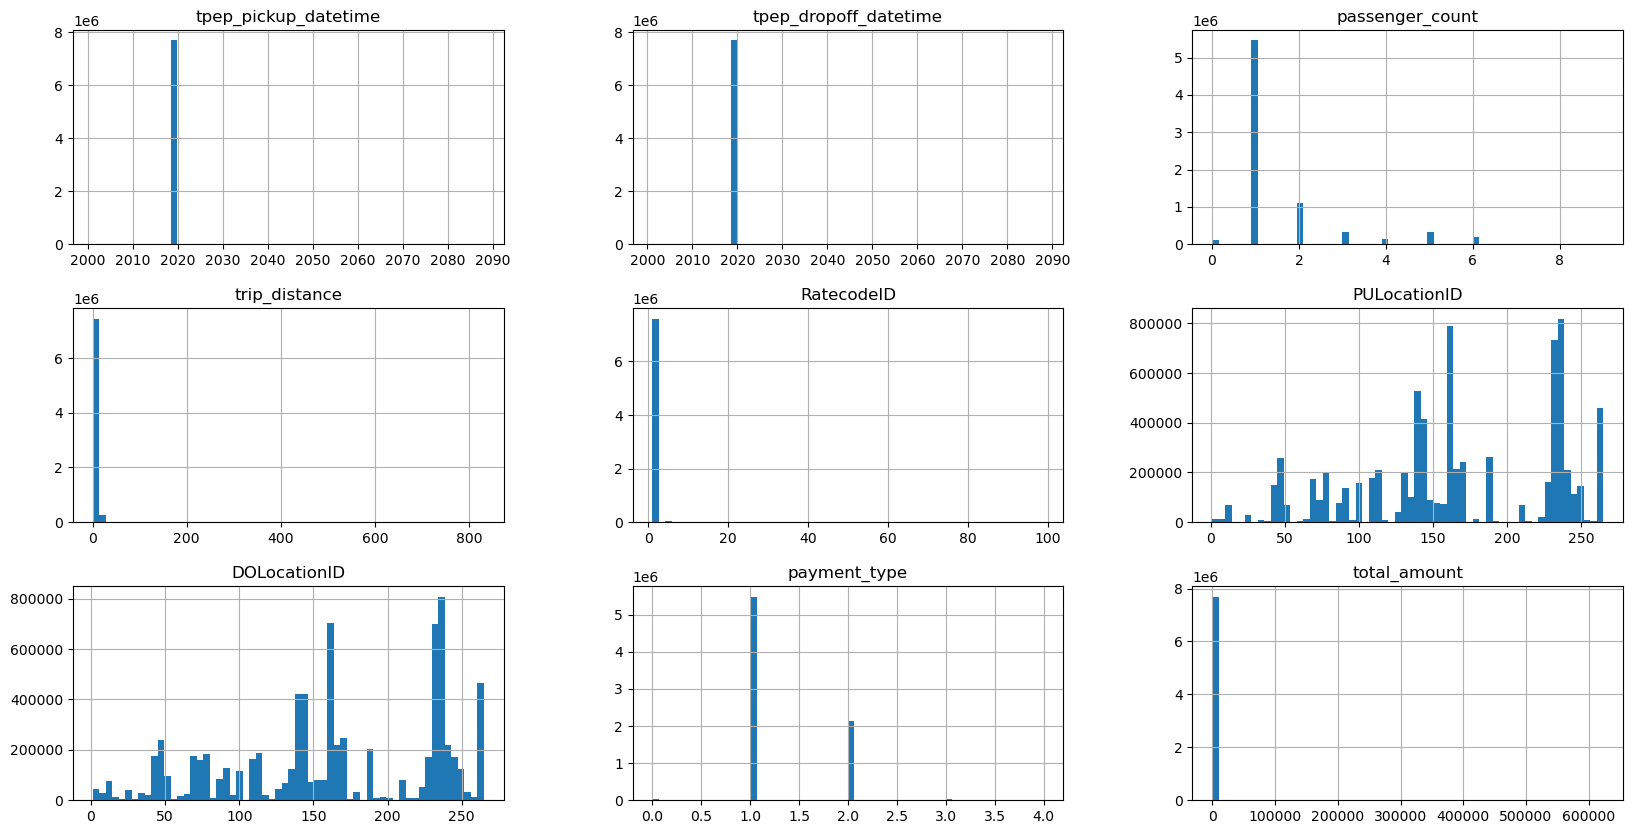

In [7]:
taxi_data.hist(figsize=(20,10),bins=60)

In [8]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

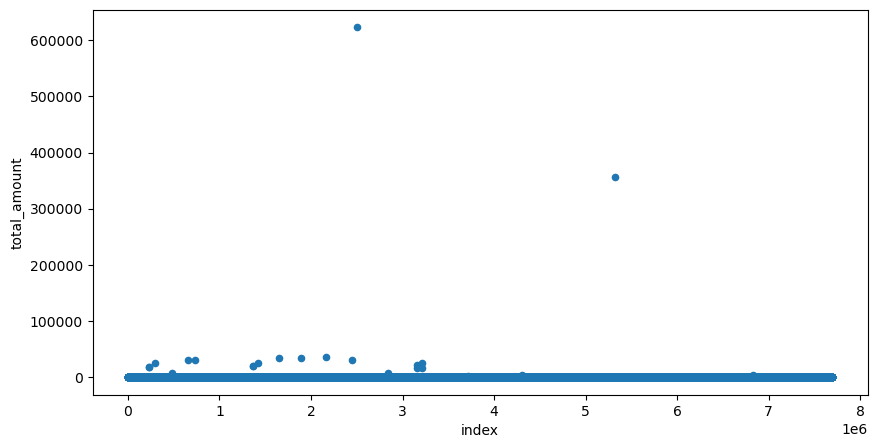

In [9]:
taxi_data.reset_index().plot(kind='scatter' ,x='index',y='total_amount' ,figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

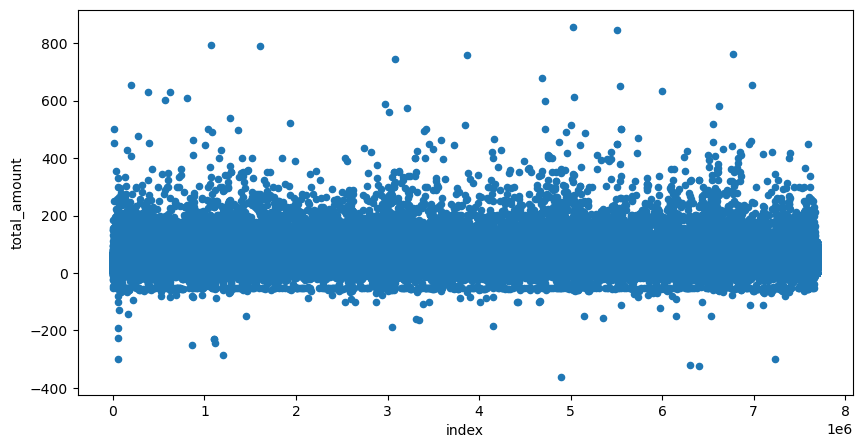

In [10]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter',x='index',y='total_amount',figsize=(10,5))

In [11]:
print(taxi_data[taxi_data['total_amount']<0].shape)

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

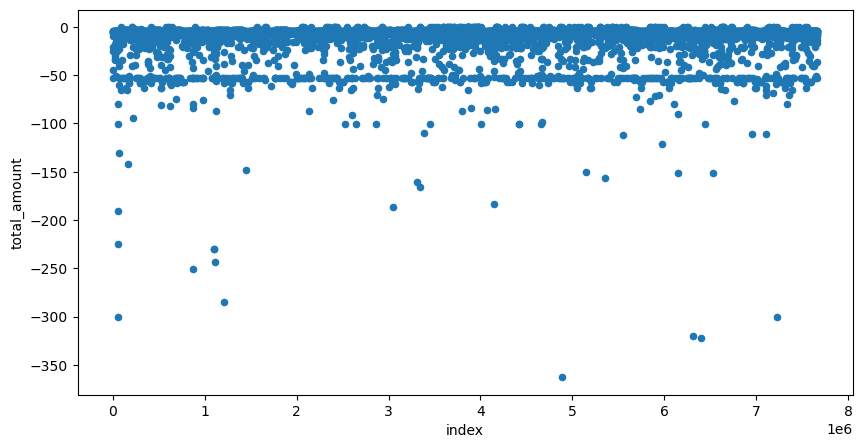

In [12]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter',x='index',y='total_amount',figsize=(10,5))

In [13]:
(taxi_data[taxi_data['total_amount']<0].head())

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [14]:
(taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts())

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

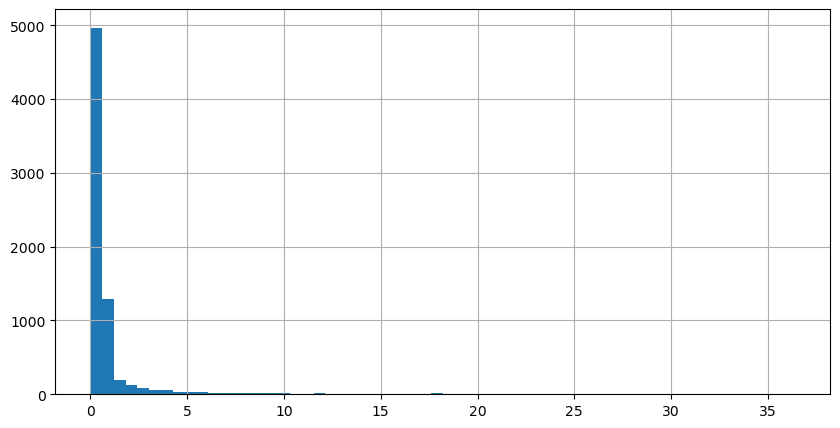

In [15]:
(taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(figsize=(10,5),bins=60))

In [16]:
print(taxi_data[taxi_data['total_amount']==0].shape)

(1643, 9)


In [17]:
(taxi_data[taxi_data['total_amount']==0].head())

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [18]:
(taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts())

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<Axes: >

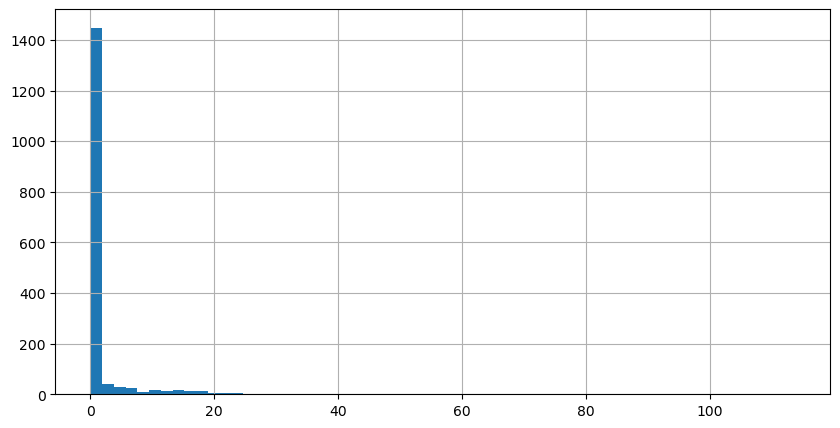

In [19]:
(taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(figsize=(10,5),bins=60))

In [20]:
(taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts())

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

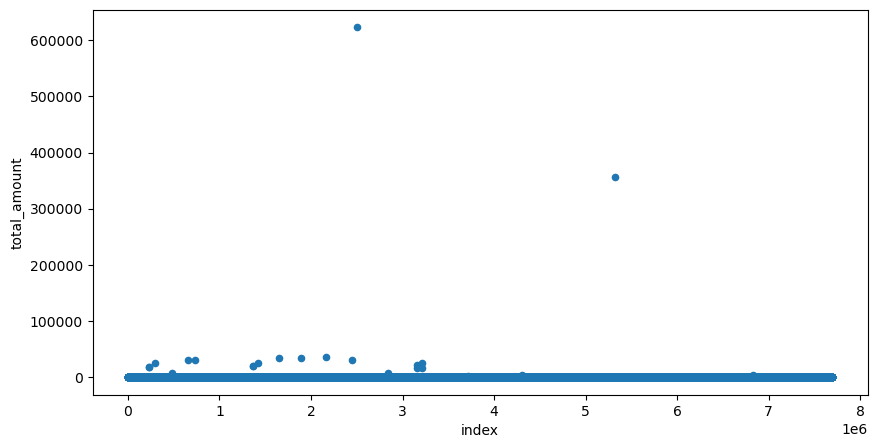

In [21]:
taxi_data.reset_index().plot(kind='scatter' ,x='index',y='total_amount' ,figsize=(10,5))

In [22]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [23]:
taxi_data['total_amount'].mean()

15.810651344610214

In [24]:
taxi_data_filtered=taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<200)]

In [25]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7696617, 9)


(7686676, 9)

In [26]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28441
trip_distance                0
RatecodeID               28441
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [27]:
taxi_data_prepared=taxi_data_filtered.copy()

In [28]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [29]:
taxi_data_prepared.loc[:,'RatecodeID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'payment_type']=taxi_data_prepared['RatecodeID'].astype(str)

In [30]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [31]:
taxi_data_prepared['transaction_date']=pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year']=taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month']=taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day']=taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour']=taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [32]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,1.0,1.0,1.0,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,1.0,1.0,1.0,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,1.0,1.0,1.0,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,1.0,1.0,1.0,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,2.0,2.0,2.0,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

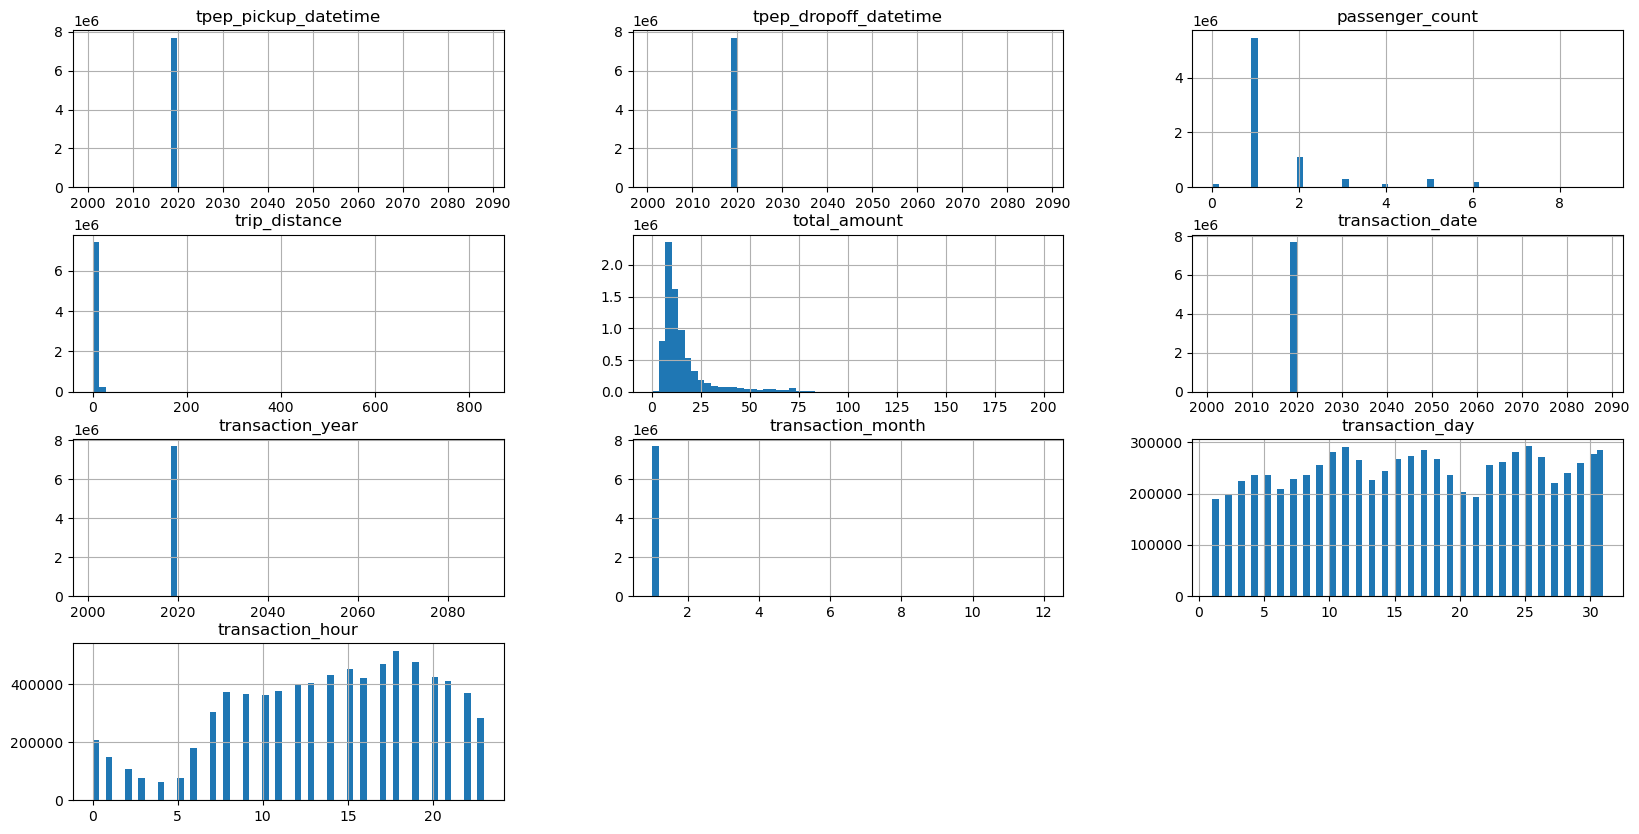

In [33]:
taxi_data_prepared.hist(figsize=(20,10),bins=60)

In [34]:
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [35]:
categorical_columns=['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns=['trip_distance','total_amount']
needed_columns= categorical_columns+numerical_columns

In [36]:
main_taxi_df=taxi_data_prepared[needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7686144, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1.0,2019-01-01,1,1,0,1.5,9.95
1,1.0,2019-01-01,1,1,0,2.6,16.30
7,1.0,2019-01-01,1,1,0,1.3,9.05
8,1.0,2019-01-01,1,1,0,3.7,18.50
9,1.0,2019-01-01,1,1,0,2.1,13.00


In [37]:
taxi_grouped_by_region=main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transaction']=main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(4552, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256
1,1.0,2019-01-01,1,1,1,3.008797,15.880940,15258
2,1.0,2019-01-01,1,1,2,3.125909,15.789893,13035
3,1.0,2019-01-01,1,1,3,3.203513,15.493270,10292
4,1.0,2019-01-01,1,1,4,3.535103,16.105968,6686


<Axes: >

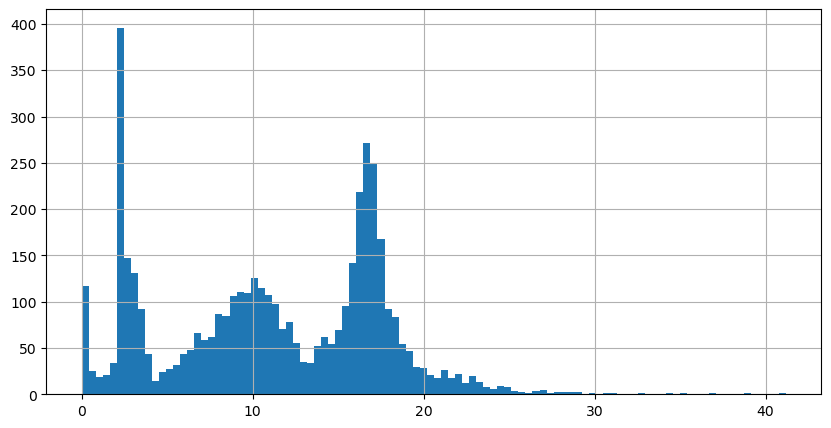

In [38]:
taxi_grouped_by_region['trip_distance'].hist(bins=100,figsize=(10,5))

<Axes: >

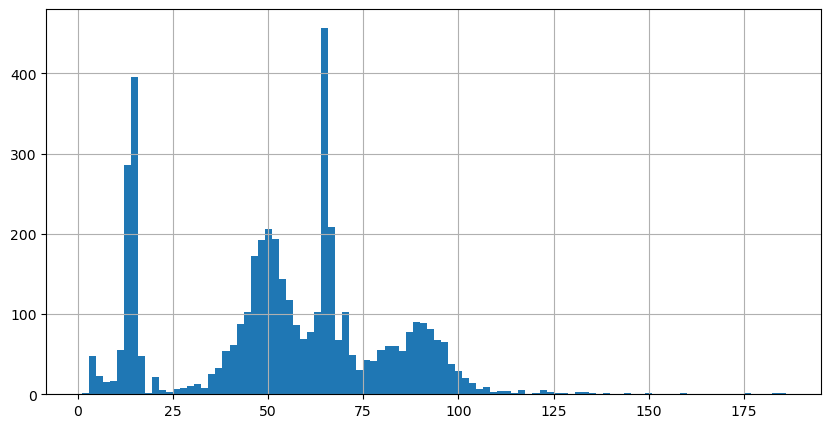

In [39]:
taxi_grouped_by_region['total_amount'].hist(bins=100,figsize=(10,5))

In [40]:
data_for_benchmark_model=taxi_grouped_by_region.copy()

In [41]:
categorical_features=['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features=categorical_features+['trip_distance']
target_feature=['total_amount']

In [42]:
from sklearn.model_selection import train_test_split
x_axis=data_for_benchmark_model[input_features]
y_axis=data_for_benchmark_model[target_feature]
x_axis=pd.get_dummies(x_axis)
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_axis,y_axis,test_size=0.33,random_state=42)

In [43]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=10)
tree.fit(x_train_b,y_train_b)

DecisionTreeRegressor(max_depth=10)